In [1]:
import numpy as np 
import pandas as pd

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import PIL
import PIL.Image
import tensorflow as tf

In [4]:
data_dir='dataset'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

87000


In [7]:
batch_size = 32
img_height = 28
img_width = 28

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32,
  color_mode="grayscale",
)

Found 87000 files belonging to 29 classes.
Using 60900 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="grayscale")

Found 87000 files belonging to 29 classes.
Using 26100 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


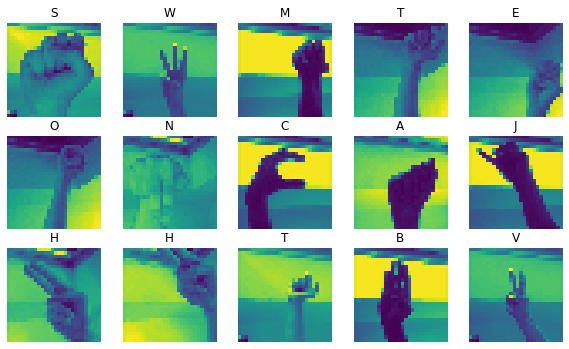

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28, 1)
(32,)


In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
#normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [16]:
from tensorflow.keras import datasets, layers, models

In [17]:
num_classes = 29

In [34]:
from tensorflow.keras.layers import Conv2D,BatchNormalization,MaxPool2D
model = models.Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 29 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 50)         

In [35]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [36]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
1904/1904 [==============================] - 798s 419ms/step - loss: 3.0346 - accuracy: 0.3909 - val_loss: 2.9271 - val_accuracy: 0.4991
Epoch 2/10
1904/1904 [==============================] - 106s 55ms/step - loss: 2.8186 - accuracy: 0.6081 - val_loss: 2.9366 - val_accuracy: 0.4891
Epoch 3/10
1904/1904 [==============================] - 107s 56ms/step - loss: 2.7251 - accuracy: 0.7012 - val_loss: 2.7835 - val_accuracy: 0.6417
Epoch 4/10
1904/1904 [==============================] - 109s 57ms/step - loss: 2.6583 - accuracy: 0.7680 - val_loss: 2.9703 - val_accuracy: 0.4540
Epoch 5/10
1904/1904 [==============================] - 110s 58ms/step - loss: 2.6399 - accuracy: 0.7859 - val_loss: 2.6157 - val_accuracy: 0.8102
Epoch 6/10
1904/1904 [==============================] - 109s 57ms/step - loss: 2.6295 - accuracy: 0.7957 - val_loss: 2.6283 - val_accuracy: 0.7974
Epoch 7/10
1904/1904 [==============================] - 110s 58ms/step - loss: 2.6169 - accuracy: 0.8083 - val_loss: 

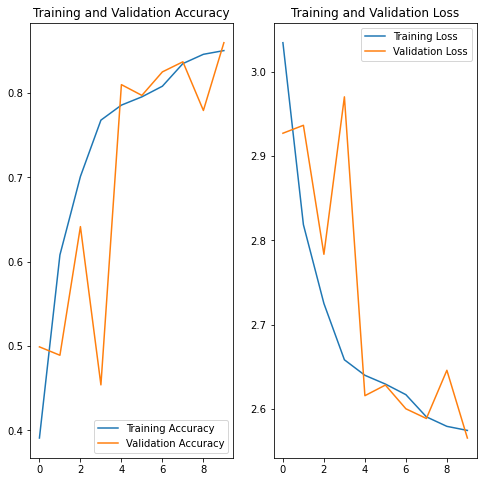

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [100]:
model.save_weights("model.h5")

In [119]:
path = 'A2.jpg'
img = keras.preprocessing.image.load_img(
   path, target_size=(img_height, img_width),color_mode="grayscale"
)

In [120]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


This image most likely belongs to A with a 8.85 percent confidence.


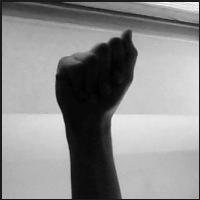

In [121]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='A2.jpg') 